In [2]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt 
import seaborn as sns 
sns.set()

In [6]:
#
#class true_geom(stats.rv_discrete):
#    def _pmf(self, k, p):
#        return ((1-p)**k)*p
#tg = true_geom(a=0, name='tg')

In [7]:
#tg.rvs(3/4, size=100)

In [8]:
stats.geom.rvs(3/4, size=100) - 1

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       2, 0, 0, 0, 2, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 2, 0, 1, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0])

In [3]:
p = [3/4, 1/2, 1/4]

plot - строить график числа частиц или нет, True по умолчанию

son - оценка мат ожидания потомков одной частицы, True по умолчанию

In [4]:
def plot(N, p, t, plot=True, son=True):
    Z = [1]*(N+2)
    Y = [1]*(N+2)
    i = 1
    
    #Оценки математического ожидания числа потомков одной частицы
    if son:
        son_a = [None]*(N+1)
        son_b = [None]*(N+1)
        
    while i<=N:
        Z[i] = np.sum(stats.geom.rvs(p[t], size=Z[i-1])-1)
        Y[i] = Y[i-1] + Z[i]
        
        if son:
            if i >= 2:
                son_a[i-1] = np.sum(Z[1:(i+1)])/np.sum(Z[0:i])
                son_b[i-1] = (Y[i] - 1)/Y[i-1]   
        i += 1
    
    if son:
        Z[N+1] = np.sum(stats.geom.rvs(p[t], size=Z[i-1])-1)
        Y[N+1] = Y[N] + Z[N+1]

        son_a[N] = np.sum(Z[1:(N+2)])/np.sum(Z[0:(N+1)])
        son_b[N] = (Y[N+1] - 1)/Y[N]
        
    if plot: 
        fig, ax = plt.subplots(figsize=(10, 10))
        ax.plot(np.arange(N+1), Z[0:N+1], label = 'Количество частиц в n-м поколении')
        ax.plot(np.arange(N+1), Y[0:N+1], label = 'Суммарное количество в n поколения')

        ax.set_xlabel('n')
        ax.legend()
        ax.set_ylabel('частиц')
        ax.set_title('Type ' + str(t))
        plt.show()
    
    if son:
        fig, ax = plt.subplots(figsize=(5,5))
        ax.plot(np.arange(N+1), son_a)
        ax.set_xlabel('n')
        ax.set_ylabel('частиц')
        ax.set_title('Оценка числа потомков одной частицы')
        
        plt.show()
       # print('Оценка числа потомков с помощью Zi:', son_a)
       # print('Оценка числа потомков с помощью Yi:', son_b)
    
    return Z[N] 

<h2> Графики числа частиц и оценки математического ожидания

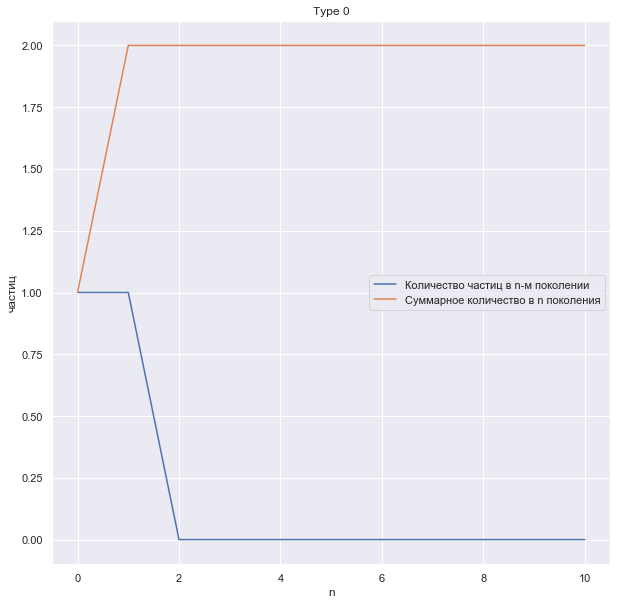

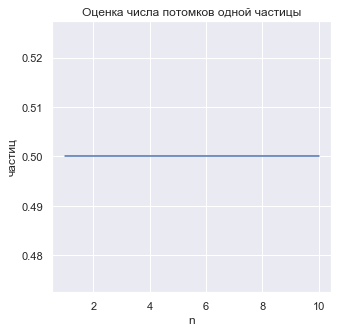

0

In [13]:
plot(10, p, 0)

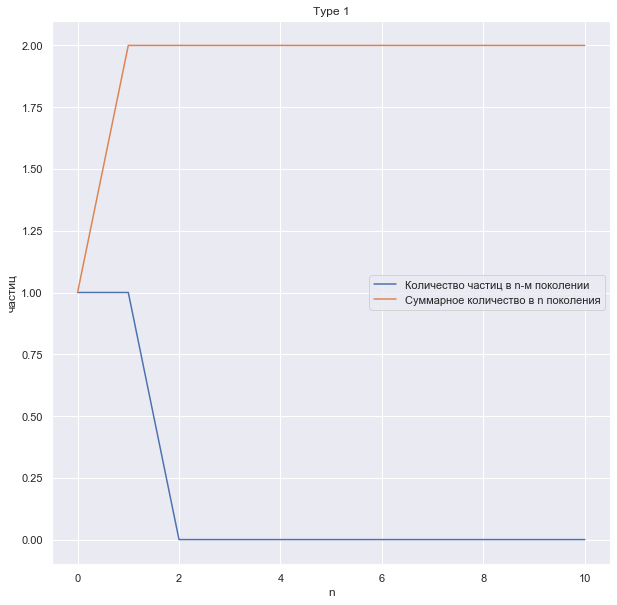

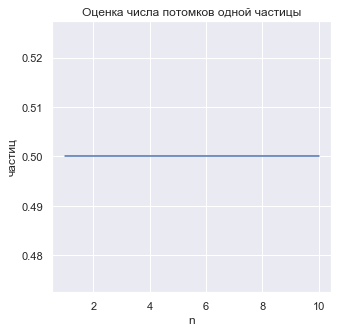

0

In [14]:
plot(10, p, 1)

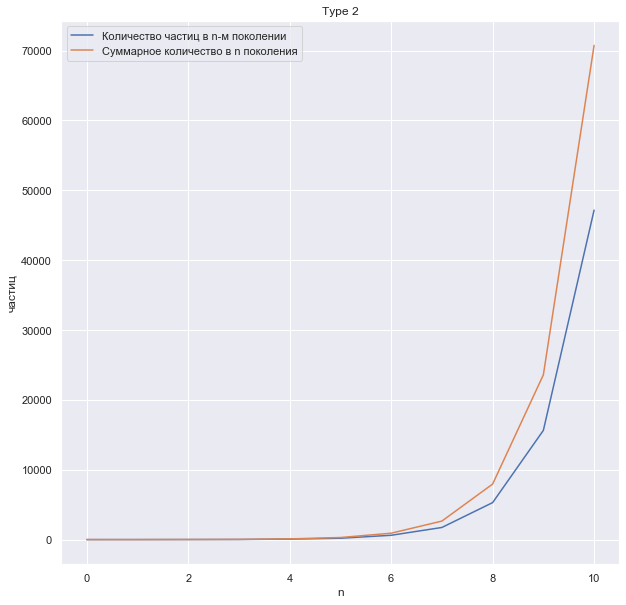

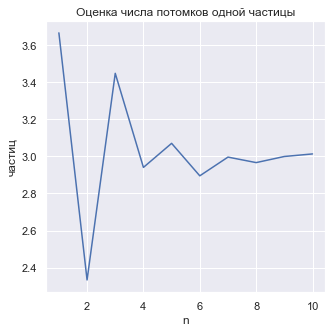

47160

In [15]:
plot(10, p, 2)

<h3> Функция вероятности вырождения, зависящая от поколения (n) и вероятности 

In [5]:
def degen(n, p):
    if p == 0.5:
        return n/(n+1)
    else:
        return (1 - ((1-p)/p)**n)/(1 - ((1-p)/p)**(n+1))

In [17]:
degen(30, p[0])

0.9999999999999968

In [18]:
degen(350, p[2])

0.3333333333333333

In [19]:
degen(30, p[1])

0.967741935483871

<h4> Подберем p так, чтобы вырождался с вероятностью более 0.8

Тогда нас интересует процесс с p < 0.5 
Откуда $q* = p/(1-p)$ 
$ p/1-p > 4/5, p > 4/9 $

In [20]:
degen(30, 4/9)

0.7998017332398255

In [21]:
degen(30, 4/9 + 1/1000)

0.8030246782820943

In [6]:
p.append(4/9 + 1/1000)

Длинная траектория:

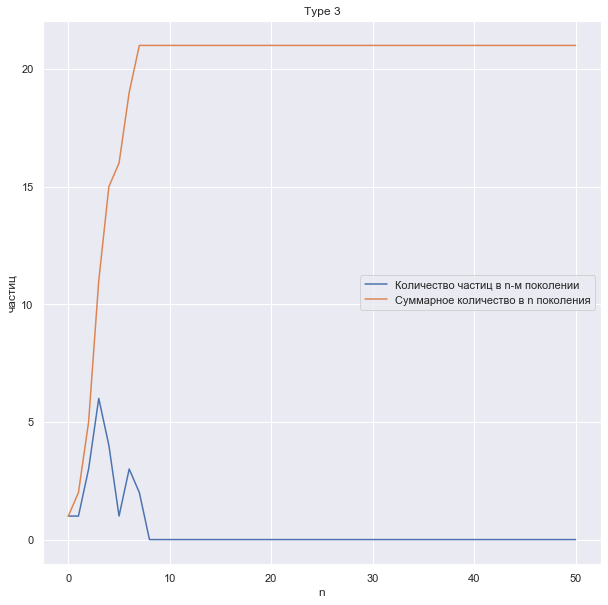

In [40]:
plot(50, p, 3)

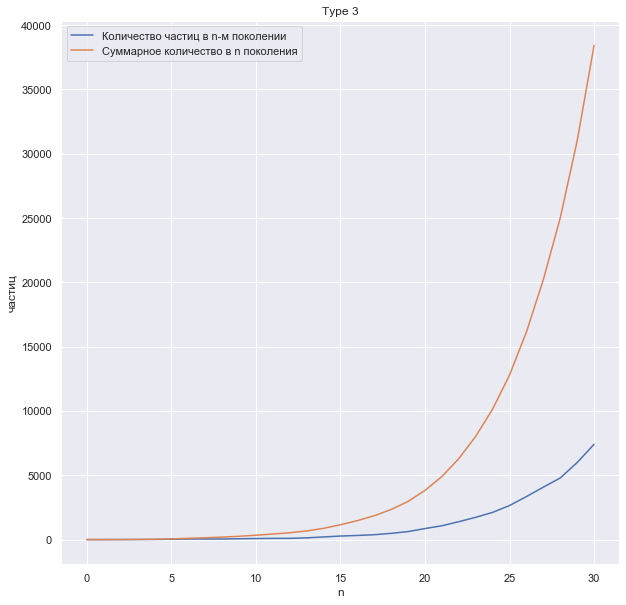

In [58]:
plot(30, p, 3)

<h3> найти долю тех частиц в поколении k, чьи потомки дожили до поколения n

In [7]:
def alive(k, n, p, t):
    # запустим ветвящийся процесс до шага k
    if (n < k) | (n <= 0) | (k <= 0):
        return 'Ошибка параметров'
    
    if n == k: 
        return 1
    Z_k = plot(k, p, t, plot=False, son=False)
    
    if Z_k == 0:
        return 'Процесс выродился к k-му шагу' 
    else:
        # Если до k-го шага не выродился, то запускаем Z_k ветвящихся процессов на (n-k) шагов
        Z_n = list()
        
        for i in range(Z_k):
            Z_n.append(plot(n-k, p, t, plot=False, son=False))
        
        # В Массиве Z_n лежат количества частиц на шаге n
        
        # доля сохранивших род среди частиц на k-м шаге до n-го
        
        return np.count_nonzero(Z_n)/Z_k

Напомними, что в массиве p, t соответсвует

0: 3/4 - докритический

1: 1/2 - критический

2: 1/4 - надкритический

3: 4/9 + 1/1000 - вырождается с вероятностью > 0.8


In [11]:
alive(3, 10, p, 2)

0.7307692307692307

<h3> для заданных двух частиц из поколения n найти их ближайшего общего предка,

In [145]:
def branch_const(n, p):
    # Матрица для хранения вершин
    if (p < 1/2):
        ss = n*(int(((1-p)/p)**n) + 1)
        X = np.zeros(ss)
    else:
        ss = n**2
        X = np.zeros(ss)
        
    Z = [1]*(n+1)
    Z.append(1)
    i = 1
    
    while (i <= n):    
        sample = np.zeros(ss, dtype=int)
        sample += np.hstack(((stats.geom.rvs(p, size=Z[i-1])- 1), np.zeros(ss-Z[i-1], dtype=int)))
        Z[i] = np.sum(sample)
        X = np.vstack([X, sample])
        i += 1
    X = X[1:,:]
    return X, Z 

In [146]:
Y, Z = branch_const(10, 1/4)
Y

array([[ 2.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  1.,  0., ...,  0.,  0.,  0.],
       [ 1.,  0.,  0., ...,  0.,  0.,  0.],
       ...,
       [ 0.,  1.,  8., ...,  0.,  0.,  0.],
       [ 3., 13.,  6., ...,  0.,  0.,  0.],
       [ 5.,  2.,  1., ...,  0.,  0.,  0.]])

In [130]:
# Функция возвращения в родитель из вершины, i > 0 , j >= 0 - индексы в матрице
def backward(X, i, j):
    k = 0
    S = X[i-1, k]
    while (S <= j):
        k += 1
        S += X[i-1, k]
    return [i-1, k]

Тест корректности 

In [133]:
T = np.array([[1, 0, 0], [2, 0, 0], [1, 1, 0], [0, 3, 0]])
backward(T, 3, 1)

[2, 1]

In [134]:
# поиск общего родителя
def parent(X, v1, v2):
    while (v1 != v2):
        v1 = backward(X, v1[0], v1[1])
        v2 = backward(X, v2[0], v2[1])
    return v1

In [147]:
Z[9]

378

In [159]:
parent(Y, [9, 0], [9,1])

[8, 0]